In [41]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [42]:
def fun(x):
    a = 25
    b = 0.9
    c = 0.35
    d = 0.35
    x1 = x[0]
    x2 = x[1]
    return (x1 - a)**2 + (x2 - b)**2 + np.exp(c*x1**2 + d*x2)

In [43]:
x = np.arange(-3, 6)
z = np.arange(-3, 6)
x, z = np.meshgrid(x, z)
y = fun([x, z])

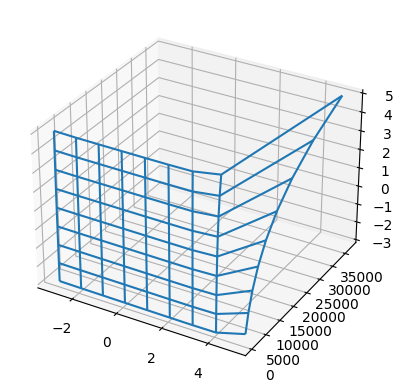

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x,y,z)

In [45]:
def simplix_method(x0, eps, a = 1, n = 4):
    x = np.array(create_simplex(x0,np.ones(n), n, a))
    history = [x0]
    while np.sqrt((1/n)* np.sum(np.square([fun(t) - fun(x0) for t in x]))) > eps:
        dists = np.array([fun(t) for t in x])
        max_indx = dists.argmax()
        c = np.sum(np.array(x)[x != x[max_indx]]) / n
        x_new = x[max_indx] + a*(c - x[max_indx])

        if fun(x_new) < dists[max_indx]:
            x[max_indx] = x_new
        else:
            min_indx = dists.argmin()
            x0 = x[min_indx]
            history.append(x0)
            a = a*0.6
            x = create_simplex(x0, x, n, a)
            
    min_indx = dists.argmin()
    x0 = x[min_indx]
    return x0, history

def create_simplex(x_base, points, n, a):
    x = []
    x.append(x_base)
    for i in range(n):
        x.append(x_base + a * (x_base - points[i]))
    return x

    

In [46]:
res, history = simplix_method([0.0, 1.0], 0.0001, 2, 100)
print(res)
print(fun(res))

[ 3.31544927 -2.55444389]
501.32042015044686


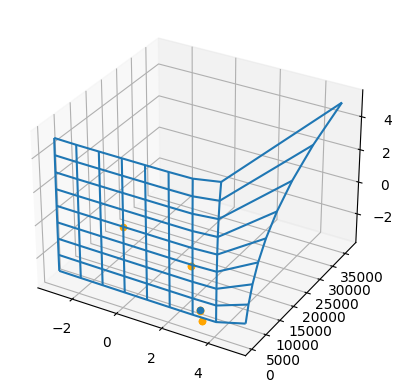

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x,y,z)

for i in history:
    ax.scatter(i[0], fun(i), i[1], color = 'orange')
ax.scatter(res[0], fun(res), res[1])

In [48]:
def update_z(z, x0, h):
    if fun(z) < fun(x0):
        z = -(x0 + h)
    elif fun(z) > fun(x0):
        z = -(x0 - h)
    else:
        z = -x0 
    return z

def Hook_Jeeves_method(x0, h, eps, lam = 0.1):
    history = []
    k = 0
    x0 = np.array(x0)
    z = np.array(x0)
    while h > eps:
        if k % 100 == 0:
            history.append(x0)

        z = update_z(z, x0, h)
        while (np.round(z,8) == np.round(x0,8)).all():
            h = h / 2
            z = update_z(z, x0, h)
        
        x0 = x0 + lam*(z - x0)
        k+=1
            
    history.append(x0)
    return x0, history
    
    

In [49]:
res, history = Hook_Jeeves_method([0.0, 1.0], 0.01, 0.001)
print(res)
print(fun(res))

[0.0005625 0.0005625]
626.7810599499804


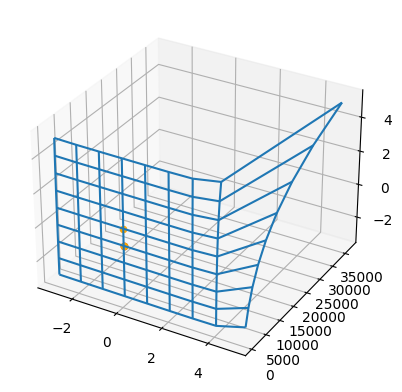

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x,y,z)
for i in history:
    ax.scatter(i[0], fun(i), i[1], color='orange')
ax.scatter(res[0], fun(res), res[1], color = 'blue')

In [51]:
def Nelder_method(x0, a, n, eps):
    k = 0
    x = np.array(create_simplex(x0, np.ones(n), n, a))
    history = [x0]
    while np.sqrt((1/n)* np.sum(np.square([fun(t) - fun(x0) for t in x]))) > eps:
        dists = np.array([fun(t) for t in x])
        
        max_indx = dists.argmax()
        min_indx = dists.argmin()
        c = np.sum(np.array(x)[x != x[max_indx]]) / n
        x_new = c + 2*(c - x[max_indx])


        if fun(x_new) < fun(x[min_indx]):
            x_new_2 = c + 2*(x_new - c)
            if fun(x_new) > fun(x_new_2):
                x[max_indx] = x_new_2
            else:
                x[max_indx] = x_new

        elif fun(x_new) > fun(x[max_indx]):
            lam = 0.2
            if fun(x[max_indx]) <= fun(x_new):
                x_new_2 = c + lam*(x[max_indx] - c)
            else:
                x_new_2 = c + lam*(x_new - c)
            
            if fun(x_new_2) < fun(x[max_indx]) or fun(x_new_2) < fun(x_new):
                x[max_indx] = x_new_2
            else:
                for i in range(len(x)):
                    x[i] = (x[i] + x[min_indx])/2
        else:
            x[max_indx] = x_new
            if(np.round(x[max_indx],8) == np.round(x_new,8)).all():
                a = a*0.6
                x = create_simplex(x[min_indx],x, n, a)
        
        x0 = x[min_indx]
        if k%10000:
            history.append(x0)
        k+=1
            
    min_indx = dists.argmin()
    x0 = x[min_indx]
    return x0, history
    

In [52]:
res, history = Nelder_method([0.0, 1.0], 4, 8, 0.0001)
print(res)
print(fun(res))
print(len(history))

[ 3.20884033 -2.21974428]
501.4807796171344
231


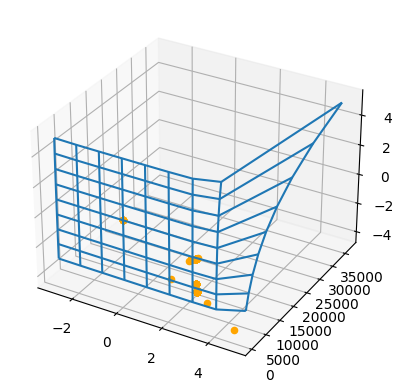

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in history:
    ax.scatter(i[0], fun(i), i[1], color ="orange")
ax.scatter(res[0], fun(res), res[1], color = 'blue')
ax.plot_wireframe(x,y,z)

In [54]:
#Функция поиска евклидово расстояния 
def distance_Euclid(point1, point2):
    return np.sum((point1 - point2) ** 2)

def distance_array(points):
    length = 0
    for i in range(len(points) - 1):
        length += distance_Euclid(points[i], points[i + 1])
    return length

def dy(x, i, h = 0.01):
    ones_vector = np.zeros(shape=x.shape)
    ones_vector[i] = h
    f1 = fun(x + ones_vector)
    f2 = fun(x - ones_vector)
    return (f1 - f2) / (2 * h)

def gradient(x):
    gradient = []
    for i in range(len(x)):
        gradient.append(dy(x, i))
    return np.array(gradient)

def gradient_method_crushing_step(x0, alpha=0.5, eps=0.001, delta=0.1):
    x = np.array(x0)
    history = [x]
    while True:
        grad = gradient(x)
        tmp_x = x - alpha * grad
        if (fun(tmp_x) - fun(x)) <= -delta * alpha * distance_array(grad):
            x = tmp_x
            history.append(x)
            if distance_array(gradient(x)) <= eps:
                history = np.array(history)
                return x, history
        else:
            alpha /= 2

In [55]:
res, history = gradient_method_crushing_step([0.0, 1.0])
print(res)
print(fun(res))
print(len(history))

[ 3.28437593 -2.39149878]
501.28920627024036
315


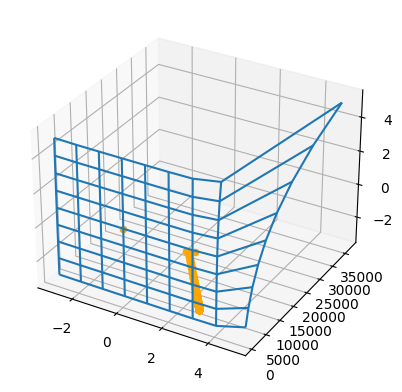

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in history:
    ax.scatter(i[0], fun(i), i[1], color ="orange")
ax.scatter(res[0], fun(res), res[1], color = 'blue')
ax.plot_wireframe(x,y,z)

In [57]:
def dichotomy(f, a=0, b=1, n=100, e=1e-3, delta=1e-5):
    while b - a > 2 * e:
        x = (a + b) / 2

        y1 = f(x - delta)
        y2 = f(x + delta)
        if (y1 <= y2).any():
            b = x + delta
        else:
            a = x - delta
    return (a + b) / 2

In [58]:
def Gauss_Seidel_algorithm(x0, eps=0.001):       
    x0 = np.array(x0) 
    x = np.array(x0)
    k = 0
    history = [x]
    while True:
        ones_vector = np.zeros(shape=x0.shape)
        for i in range(len(x0)):
            ones_vector[i] = 1
            grad = gradient(x)
            alpha = dichotomy(lambda a: x - a * grad * ones_vector)
            x = x - alpha * grad * ones_vector
            ones_vector[i] = 0
            if k%100 == 0:
                history.append(x)
            k+=1
        if  distance_array(gradient(x)) <= eps:
            history = np.array(history)
            return x, history
        

In [59]:
res, history = Gauss_Seidel_algorithm([0.0, 1.0])
print(res)
print(fun(res))
print(len(history))

[ 3.28435383 -2.3913353 ]
501.28921098382585
53


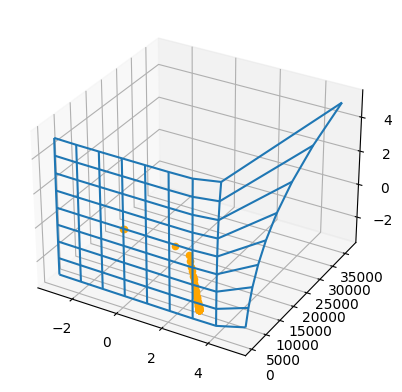

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in history:
    ax.scatter(i[0], fun(i), i[1], color ="orange")
ax.scatter(res[0], fun(res), res[1], color = 'blue')
ax.plot_wireframe(x,y,z)